In [461]:
import pandas as pd
from tensorflow import keras
import numpy as np
  
from sklearn.model_selection import train_test_split


In [462]:
df = pd.read_csv('Data/Cleaned/NoFG_Prior_Present.csv')

In [464]:
df = df.sample(frac=1).reset_index(drop=True)

In [466]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [467]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=1)

In [468]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [469]:
# Want to make 3 models = Simple, Medium, Complex and show it overfits. 
e = 250
batch_s = 8
p = 50

opt = keras.optimizers.Adam()

In [470]:
early = keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=p, verbose=0,
    mode='min', baseline=None, restore_best_weights=True
)

In [471]:

model_simple = keras.models.Sequential()
model_simple.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_simple.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history_simple = model_simple.fit(x_train, y_train.astype(int), epochs = e, \
                                  batch_size = batch_s, validation_data = (x_test, y_test),\
                                  callbacks = [early], verbose = 0)

simple_e = early.stopped_epoch - p

In [472]:
model_medium = keras.models.Sequential()
model_medium.add(keras.layers.Dense(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_medium.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history_medium = model_medium.fit(x_train, y_train.astype(int), epochs = e, \
                                  batch_size = batch_s, validation_data = (x_test, y_test),\
                                  callbacks = [early], verbose = 0)

medium_e = early.stopped_epoch - p

In [473]:
model_complex = keras.models.Sequential()
model_complex.add(keras.layers.Dense(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_complex.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history_complex = model_complex.fit(x_train, y_train.astype(int), epochs = e, \
                                  batch_size = batch_s, validation_data = (x_test, y_test),\
                                  callbacks = [early], verbose = 0)

complex_e = early.stopped_epoch - p

In [474]:
x_axis = max(simple_e, medium_e, complex_e)

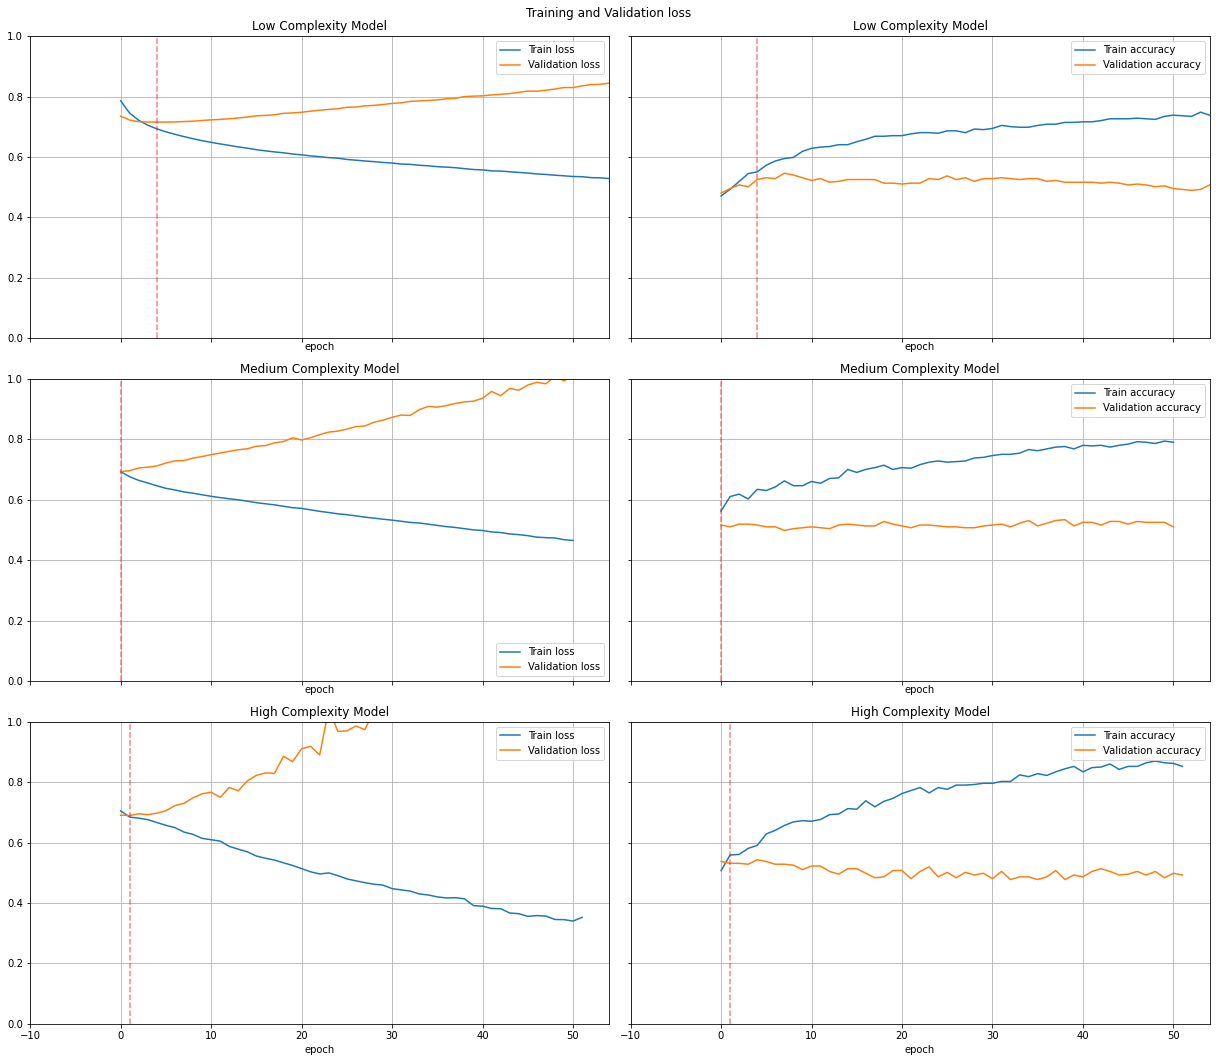

In [475]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(17)

history = history_simple
fig.suptitle('ANN Training and Validation loss')
axs[0, 0].set_title('Low Complexity Model')
axs[0, 0].plot(history.history['loss'], label='Train loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation loss')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim([-10,x_axis + p])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].set_xlabel('epoch')
axs[0, 0].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)


axs[0, 1].set_title('Low Complexity Model')
axs[0, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xlim([-10,x_axis + p])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].set_xlabel('epoch')
axs[0, 1].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)


history = history_medium

axs[1, 0].set_title('Medium Complexity Model')
axs[1, 0].plot(history.history['loss'], label='Train loss')
axs[1, 0].plot(history.history['val_loss'], label='Validation loss')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim([-10,x_axis + p])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].set_xlabel('epoch')
axs[1, 0].axvline(x=medium_e, color='r', linestyle='--', alpha = 0.5)


axs[1, 1].set_title('Medium Complexity Model')
axs[1, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[1, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim([-10,x_axis+p])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].set_xlabel('epoch')
axs[1, 1].axvline(x=medium_e, color='r', linestyle='--', alpha = 0.5)


history = history_complex

axs[2, 0].set_title('High Complexity Model')
axs[2, 0].plot(history.history['loss'], label='Train loss')
axs[2, 0].plot(history.history['val_loss'], label='Validation loss')
axs[2, 0].legend()
axs[2, 0].grid(True)
axs[2, 0].set_xlim([-10,x_axis+p])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].set_xlabel('epoch')
axs[2, 0].axvline(x=complex_e, color='r', linestyle='--', alpha = 0.5)


axs[2, 1].set_title('High Complexity Model')
axs[2, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[2, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[2, 1].legend()
axs[2, 1].grid(True)
axs[2, 1].set_xlim([-10,x_axis + p])
axs[2, 1].set_ylim([0,1.0])
axs[2, 1].set_xlabel('epoch')
axs[2, 1].axvline(x=complex_e, color='r', linestyle='--', alpha = 0.5)

plt.tight_layout()

plt.savefig('Plots_ModelOverfitting/ANN.png')


## Lstm

In [476]:
df = pd.read_csv('Data/Cleaned/NoFG_Prior_Present.csv')

In [477]:
def date(x):
    import datetime
    return datetime.datetime.strptime(x, '%Y-%m-%d')
def train_test_split2(df, train_split=0.8):
    # This splits the data into train and test splits
    obs = df.shape[0]
    train_split_point = int(train_split * obs)
    # Sort date columns to ensure its in order n then you can split
    df['prediction_day'] = df['prediction_day'].apply(date)
    df.sort_values(by='prediction_day', ascending=True)

    df['time_int'] = df['prediction_day'].apply(lambda x: x.value)

    # Split the data first and then do the rest
    train = df.iloc[:train_split_point]
    test = df.iloc[train_split_point:]

    return train.values, test.values

In [478]:
train, test = train_test_split2(df)


In [479]:
features_train = train[:, 1:-2]
features_test = test[:, 1:-2]

scaler = StandardScaler().fit(features_train)

features_train1 = scaler.transform(features_train)
features_test1 = scaler.transform(features_test)

train[:, 1:-2] = features_train1
test[:, 1:-2] = features_test1


In [480]:
def sequencer(df, seq_len=7):
    from collections import deque
    # This function is specifically for sequencing the data so it can be used with an RNN
    sequential_data = []
    prev_days = deque(maxlen=seq_len)

    for i in df:  # iterate over the values
        prev_days.append([n for n in i[1:-2]])
        if len(prev_days) == seq_len:
            sequential_data.append([np.array(prev_days), i[-2]])
    X = []
    y = []
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X), np.array(y)

In [481]:
x_train, y_train = sequencer(train)
x_test, y_test = sequencer(test)

In [482]:
x_train.shape

(662, 7, 24)

In [223]:
model_simple = keras.models.Sequential()
model_simple.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_simple.add(keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_simple.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_simple = model_simple.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [224]:
model_medium = keras.models.Sequential()
model_medium.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_medium.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_medium.add(keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_medium.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_medium = model_medium.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

In [225]:
model_complex = keras.models.Sequential()
model_complex.add(keras.layers.LSTM(6, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_complex.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal', return_sequences = True))
model_complex.add(keras.layers.LSTM(12, activation = 'relu', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(24, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(12, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model_complex.add(keras.layers.Dense(1, activation = 'sigmoid'))
model_complex.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_complex = model_complex.fit(x_train, y_train, epochs = e, batch_size = batch_s, validation_data = (x_test, y_test), verbose = 0)

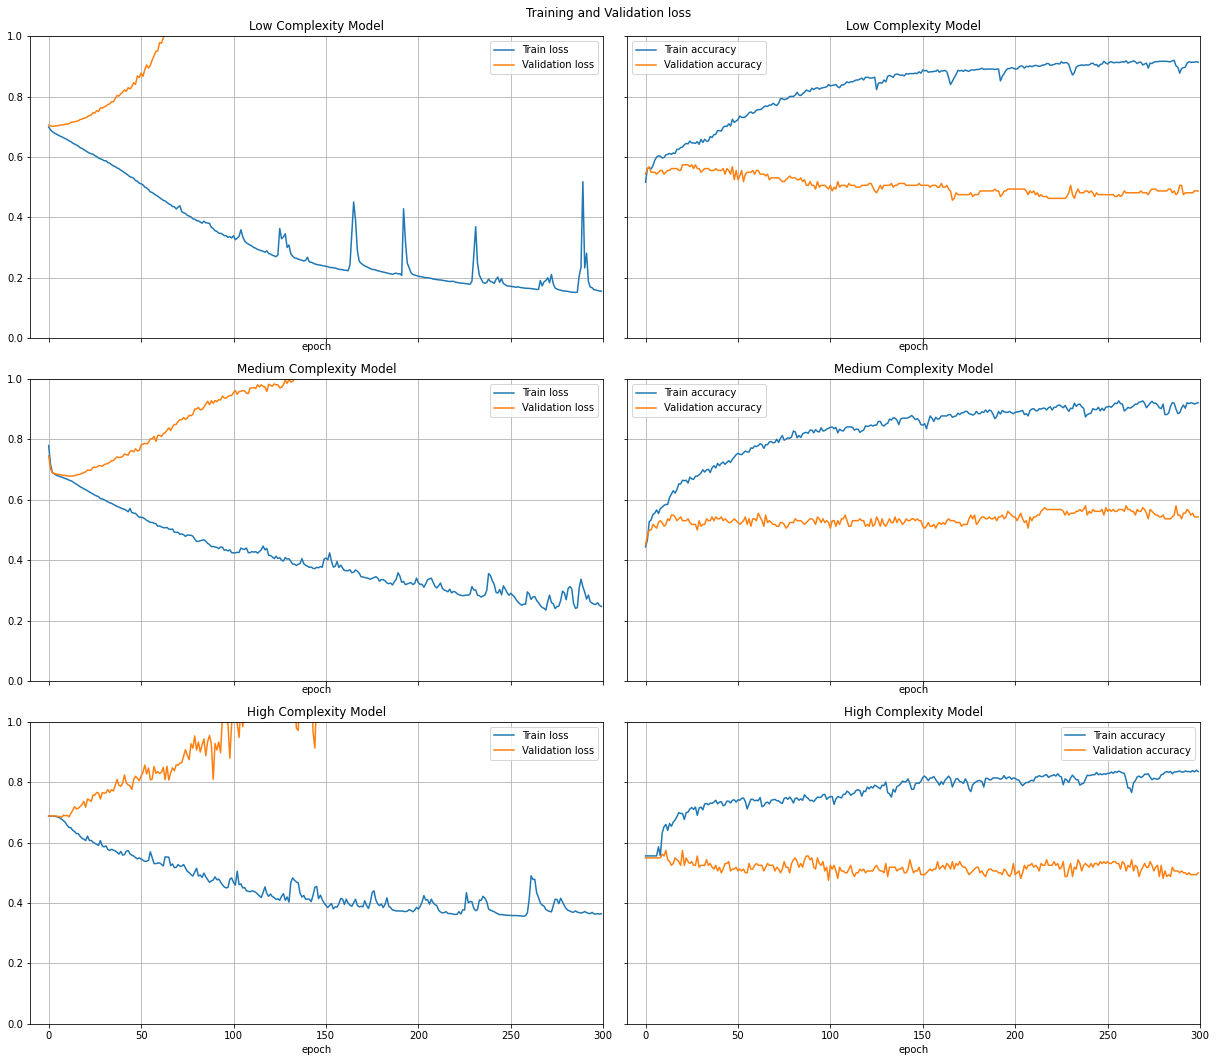

In [226]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)
fig.set_figheight(15)
fig.set_figwidth(17)

history = history_simple
fig.suptitle('RNN Training and Validation loss')
axs[0, 0].set_title('Low Complexity Model')
axs[0, 0].plot(history.history['loss'], label='Train loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation loss')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim([-10,x_axis + p])
axs[0, 0].set_ylim([0,1.0])
axs[0, 0].set_xlabel('epoch')
axs[0, 0].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)


axs[0, 1].set_title('Low Complexity Model')
axs[0, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[0, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xlim([-10,x_axis + p])
axs[0, 1].set_ylim([0,1.0])
axs[0, 1].set_xlabel('epoch')
axs[0, 1].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)


history = history_medium

axs[1, 0].set_title('Medium Complexity Model')
axs[1, 0].plot(history.history['loss'], label='Train loss')
axs[1, 0].plot(history.history['val_loss'], label='Validation loss')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim([-10,x_axis + p])
axs[1, 0].set_ylim([0,1.0])
axs[1, 0].set_xlabel('epoch')
axs[1, 0].axvline(x=medium_e, color='r', linestyle='--', alpha = 0.5)


axs[1, 1].set_title('Medium Complexity Model')
axs[1, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[1, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim([-10,x_axis+p])
axs[1, 1].set_ylim([0,1.0])
axs[1, 1].set_xlabel('epoch')
axs[1, 1].axvline(x=medium_e, color='r', linestyle='--', alpha = 0.5)


history = history_complex

axs[2, 0].set_title('High Complexity Model')
axs[2, 0].plot(history.history['loss'], label='Train loss')
axs[2, 0].plot(history.history['val_loss'], label='Validation loss')
axs[2, 0].legend()
axs[2, 0].grid(True)
axs[2, 0].set_xlim([-10,x_axis+p])
axs[2, 0].set_ylim([0,1.0])
axs[2, 0].set_xlabel('epoch')
axs[2, 0].axvline(x=complex_e, color='r', linestyle='--', alpha = 0.5)


axs[2, 1].set_title('High Complexity Model')
axs[2, 1].plot(history.history['accuracy'], label='Train accuracy')
axs[2, 1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[2, 1].legend()
axs[2, 1].grid(True)
axs[2, 1].set_xlim([-10,x_axis + p])
axs[2, 1].set_ylim([0,1.0])
axs[2, 1].set_xlabel('epoch')
axs[2, 1].axvline(x=complex_e, color='r', linestyle='--', alpha = 0.5)

plt.tight_layout()


plt.savefig('Plots_ModelOverfitting/LSTM.png')

In [652]:
import pickle

In [653]:
result_nn = open('Results/5_Results_NN.pkl', 'rb')
result_nn1 = pickle.load(result_nn)
print(result_nn1)

{'NoFG_NoPrior_': {0: 0.5508981943130493, 1: 0.5269461274147034, 2: 0.5508981943130493, 3: 0.5508981943130493, 4: 0.5508981943130493}, 'NoFG_Prior_': {0: 0.5508981943130493, 1: 0.5508981943130493, 2: 0.5508981943130493, 3: 0.5508981943130493, 4: 0.5628742575645447}, 'FG_Prior_': {0: 0.5508981943130493, 1: 0.5329341292381287, 2: 0.5508981943130493, 3: 0.5508981943130493, 4: 0.5508981943130493}}


In [654]:
result_nn = open('Results/6_Results.pkl', 'rb')
result_nn1 = pickle.load(result_nn)
print(result_nn1)

{'NoFG_NoPrior_': {0: 0.5465838313102722, 1: 0.5465838313102722, 2: 0.5465838313102722, 3: 0.5279502868652344, 4: 0.5465838313102722}, 'NoFG_Prior_': {0: 0.5465838313102722, 1: 0.5465838313102722, 2: 0.5465838313102722, 3: 0.5465838313102722, 4: 0.5465838313102722}, 'FG_Prior_': {0: 0.5465838313102722, 1: 0.5465838313102722, 2: 0.5652173757553101, 3: 0.5465838313102722, 4: 0.5465838313102722}}


In [3]:
from _5_processing_functions import *
from tensorflow import keras
import keras_tuner as kerastuner
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    BatchNormalization
)
import numpy as np
from sklearn import model_selection
import tensorflow as tf


def build_model(hp):
    METRICS = ['accuracy', tf.keras.metrics.AUC(name='auc', num_thresholds=200)]

    model = keras.Sequential()

    for i in range(hp.Choice('num_layers', [1, 2, 3, 4, 5, 6, 10])):
        model.add(Dense(units=hp.Choice('layer_' + str(i) + '_width', [4, 8, 16, 32, 64, 128, 256]),
                        kernel_initializer=hp.Choice('kernel_' + str(i), ['glorot_uniform', 'glorot_normal', 'TruncatedNormal', 'Zeros']),
                        activation=hp.Choice('activation_' + str(i), ['relu', 'tanh']),
                        kernel_regularizer=tf.keras.regularizers.l1(hp.Choice('learning_rate' + str(i), [1.0,0.1, 0.01, 0.001]))))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Choice('dropout_' + str(i), [0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9])))

    # Add different optimizers
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [10.0, 1.0, 0.1, 0.01, 0.001, 0.0001])),
                  loss='binary_crossentropy',
                  metrics=METRICS)
    return model


class CVTuner(kerastuner.engine.tuner.Tuner):
    def run_trial(self, trial, train, test, executions=3, *args, **kwargs):
        early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=25, verbose=0,
            mode='min', baseline=None, restore_best_weights=True
        )

        kwargs['batch_size'] = trial.hyperparameters.Choice('batch_size', [8, 16, 32, 64, 128, 256])
        print(kwargs)
        exec_store = []
        exec_store_loss = []
        for exe in range(executions):
            cv = model_selection.KFold(5, shuffle=True)
            val_acc = []
            val_loss = []
            for train_indices, test_indices in cv.split(train):
                x_train, x_val = train[train_indices], train[test_indices]
                x_train, y_train, x_val, y_val, _1, _2 = processing_cv(x_train, x_val, test, seq=False,
                                                                       fg=kwargs['f_graph'])

                model = self.hypermodel.build(trial.hyperparameters)
                model.fit(x_train, y_train,
                          batch_size=kwargs['batch_size'],
                          epochs=kwargs['epochs'],
                          validation_data=(x_val, y_val),
                          callbacks=[early_stop])

                val_acc.append(model.evaluate(x_val, y_val)[1])
                val_loss.append(model.evaluate(x_val, y_val)[0])
            # Mean or max??
            exec_store.append(np.mean(val_acc))
            exec_store_loss.append(np.mean(val_loss))

        self.oracle.update_trial(trial.trial_id, {'val_accuracy': np.mean(exec_store),
                                                  'val_loss': np.mean(exec_store_loss)})
        self.save_model(trial.trial_id, model)


In [58]:
tuner = CVTuner(
        hypermodel=build_model,
        oracle=kerastuner.oracles.BayesianOptimization(
            objective=kerastuner.Objective("val_accuracy", direction="max"),
            max_trials=300),
        directory='Tuning/NoFG_NoPrior_',
        project_name='LSTM')

INFO:tensorflow:Reloading Oracle from existing project Tuning/NoFG_NoPrior_/LSTM/oracle.json
INFO:tensorflow:Reloading Tuner from Tuning/NoFG_NoPrior_/LSTM/tuner0.json


In [59]:
tuner.reload()
tuner.get_best_models(num_models=5)
x = tuner.get_best_models(10)[2]

In [66]:
x.get_config()

{'space': [{'class_name': 'Choice',
   'config': {'name': 'num_LSTM_layers',
    'default': 1,
    'conditions': [],
    'values': [1, 2, 3, 4, 5, 6],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'LSTM_layer_0_width',
    'default': 4,
    'conditions': [],
    'values': [4, 8, 16, 32, 64, 128, 256],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'kernel_0',
    'default': 'glorot_uniform',
    'conditions': [],
    'values': ['glorot_uniform', 'glorot_normal'],
    'ordered': False}},
  {'class_name': 'Choice',
   'config': {'name': 'activation_0',
    'default': 'relu',
    'conditions': [],
    'values': ['relu', 'tanh'],
    'ordered': False}},
  {'class_name': 'Choice',
   'config': {'name': 'dropout_0',
    'default': 0.0,
    'conditions': [],
    'values': [0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'LSTM_layer_outside_width',
    'default': 4,
    'con

In [61]:
x = tuner.get_best_hyperparameters(10)[3]

In [62]:
x.get_config()

{'space': [{'class_name': 'Choice',
   'config': {'name': 'num_LSTM_layers',
    'default': 1,
    'conditions': [],
    'values': [1, 2, 3, 4, 5, 6],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'LSTM_layer_0_width',
    'default': 4,
    'conditions': [],
    'values': [4, 8, 16, 32, 64, 128, 256],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'kernel_0',
    'default': 'glorot_uniform',
    'conditions': [],
    'values': ['glorot_uniform', 'glorot_normal'],
    'ordered': False}},
  {'class_name': 'Choice',
   'config': {'name': 'activation_0',
    'default': 'relu',
    'conditions': [],
    'values': ['relu', 'tanh'],
    'ordered': False}},
  {'class_name': 'Choice',
   'config': {'name': 'dropout_0',
    'default': 0.0,
    'conditions': [],
    'values': [0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'LSTM_layer_outside_width',
    'default': 4,
    'con

In [63]:
x = tuner.get_best_hyperparameters(10)[2]
x.get('batch_size')

8

In [64]:
x.get('learning_rate')

0.01

In [65]:
x = tuner.get_best_hyperparameters(10)[4]
df = pd.read_csv('Data/Cleaned/NoFG_NoPrior_Present.csv')
train, test = train_test_split(df.sample(frac = 1))
train, val = train_validation_split(train)
x_train, y_train, x_val, y_val, x_test, y_test = processing_cv(train, val, test, fg=(False, 0))

In [668]:
early_stop = tf.keras.callbacks.EarlyStopping(
            monitor='val_loss', min_delta=0, patience=10, verbose=0,
            mode='min', baseline=None, restore_best_weights=False
        )
t = 0
while t < 0.56:
    hypermodel = tuner.hypermodel.build(x)
            # Retrain the model
    hist = hypermodel.fit(x_train, y_train, epochs=250, validation_data=(x_val, y_val), callbacks =[early_stop], verbose = 0)

    t = hypermodel.evaluate(x_test, y_test)[1]
    print(t)
    print(confusion_matrix(y_test, hypermodel.predict(x_test) > 0.5))
    

6/6 [==============================] - 0s 1ms/step - loss: 0.7593 - accuracy: 0.5090 - auc: 0.5224
0.5089820623397827
[[ 9 71]
 [11 76]]
6/6 [==============================] - 0s 1ms/step - loss: 0.7658 - accuracy: 0.5449 - auc: 0.5231
0.544910192489624
[[19 61]
 [15 72]]
6/6 [==============================] - 0s 906us/step - loss: 0.7676 - accuracy: 0.5269 - auc: 0.5124
0.5269461274147034
[[26 54]
 [25 62]]


KeyboardInterrupt: 

In [ ]:
cm = confusion_matrix(y_test, hypermodel.predict(x_test) > 0.5, normalize = 'true')
print(cm)
cm = np.round(cm, decimals=2)

In [651]:
print(cm)

[[0.34 0.66]
 [0.28 0.72]]


Text(0.5, 0, 'epoch')

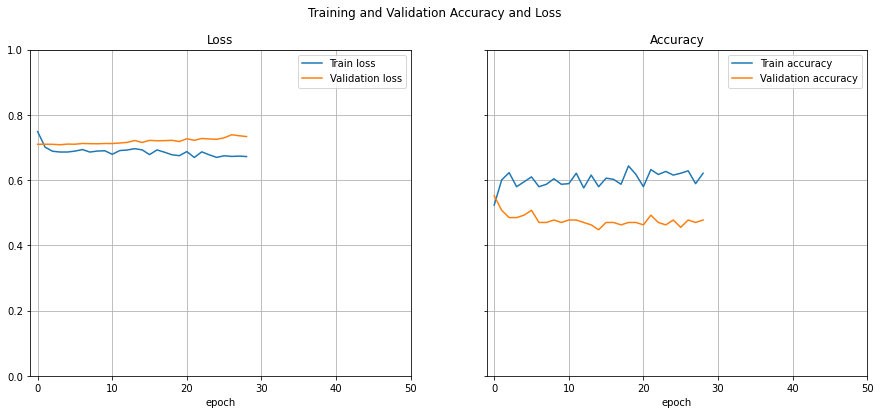

In [631]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_figheight(6)
fig.set_figwidth(15)

history = hist
fig.suptitle('Training and Validation Accuracy and Loss')
axs[0].set_title('Loss')
axs[0].plot(history.history['loss'], label='Train loss')
axs[0].plot(history.history['val_loss'], label='Validation loss')
axs[0].legend()
axs[0].grid(True)
axs[0].set_xlim([-1, 50 ])
axs[0].set_ylim([0,1.0])
axs[0].set_xlabel('epoch')
# axs[0, 0].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)


axs[1].set_title('Accuracy')
axs[1].plot(history.history['accuracy'], label='Train accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation accuracy')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xlim([-1,50])
axs[1].set_ylim([0,1.0])
axs[1].set_xlabel('epoch')
# axs[0, 1].axvline(x=simple_e, color='r', linestyle='--', alpha = 0.5)